# Home Credit Default Risk - Machine Learning Project

## Project Overview
- Predict loan default risk using historical credit data.
- Objectives: Improve financial risk assessment, reduce losses for lenders.

# Processing `credit_card_balance.csv` (Credit Card Transactions History)

## 1. Load Data (`credit_card_balance.csv`)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
# Load dataset 
df_credit_card_balance = pd.read_csv("/kaggle/input/home-credit-default-risk/credit_card_balance.csv")

## 2. Initial Data Inspection (`credit_card_balance.csv`)

In [3]:
# Check for infinite values
print("🔍 Checking for infinite values in dataset...")
inf_count = (df_credit_card_balance == np.inf).sum().sum()
neg_inf_count = (df_credit_card_balance == -np.inf).sum().sum()

if inf_count > 0 or neg_inf_count > 0:
    print(f"⚠️ Found {inf_count} positive and {neg_inf_count} negative infinite values!")
else:
    print("✅ No infinite values detected.")

🔍 Checking for infinite values in dataset...
✅ No infinite values detected.


In [4]:
# 🔍 Check for missing values
missing_values = df_credit_card_balance.isnull().sum()
missing_values = missing_values[missing_values > 0]  

if not missing_values.empty:
    print("⚠️ Missing values detected in columns:")
    print(missing_values)
else:
    print("✅ No missing values detected.")

⚠️ Missing values detected in columns:
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
dtype: int64


In [5]:
# 📋 Print column names
print(df_credit_card_balance.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


In [6]:
# Check for extreme values using percentile-based thresholds 
print("🔍 Checking for extreme values in 'credit_card_balance' dataset using percentile thresholds...")

# Exclude ID columns from percentile-based detection
extreme_exclude_cols = ['SK_ID_PREV', 'SK_ID_CURR']  
extreme_numeric_columns = df_credit_card_balance.select_dtypes(include=["number"]).drop(columns=extreme_exclude_cols, errors='ignore')

# Compute percentile-based thresholds
extreme_upper_threshold = extreme_numeric_columns.quantile(0.99)
extreme_lower_threshold = extreme_numeric_columns.quantile(0.01)

# Identify extreme values
extreme_large_columns = extreme_numeric_columns.max() > extreme_upper_threshold
extreme_small_columns = extreme_numeric_columns.min() < extreme_lower_threshold

# Print results
if extreme_large_columns.any():
    print(f"⚠️ Columns with very large values (above 99th percentile):\n{extreme_numeric_columns.loc[:, extreme_large_columns].max()}")
if extreme_small_columns.any():
    print(f"⚠️ Columns with very small values (below 1st percentile):\n{extreme_numeric_columns.loc[:, extreme_small_columns].min()}")
if not extreme_large_columns.any() and not extreme_small_columns.any():
    print("✅ No extreme values detected in 'credit_card_balance' dataset.")

🔍 Checking for extreme values in 'credit_card_balance' dataset using percentile thresholds...
⚠️ Columns with very large values (above 99th percentile):
AMT_BALANCE                   1505902.185
AMT_CREDIT_LIMIT_ACTUAL       1350000.000
AMT_DRAWINGS_ATM_CURRENT      2115000.000
AMT_DRAWINGS_CURRENT          2287098.315
AMT_DRAWINGS_OTHER_CURRENT    1529847.000
AMT_DRAWINGS_POS_CURRENT      2239274.160
AMT_INST_MIN_REGULARITY        202882.005
AMT_PAYMENT_CURRENT           4289207.445
AMT_PAYMENT_TOTAL_CURRENT     4278315.690
AMT_RECEIVABLE_PRINCIPAL      1472316.795
AMT_RECIVABLE                 1493338.185
AMT_TOTAL_RECEIVABLE          1493338.185
CNT_DRAWINGS_ATM_CURRENT           51.000
CNT_DRAWINGS_CURRENT              165.000
CNT_DRAWINGS_OTHER_CURRENT         12.000
CNT_DRAWINGS_POS_CURRENT          165.000
CNT_INSTALMENT_MATURE_CUM         120.000
SK_DPD                           3260.000
SK_DPD_DEF                       3260.000
dtype: float64
⚠️ Columns with very small values 

In [7]:
# Check the shape of the dataset
print("DataFrame Shape:", df_credit_card_balance.shape)

DataFrame Shape: (3840312, 23)


In [8]:
# Display first few rows of the dataset
print("First few rows of credit_card_balance DataFrame:")
display(df_credit_card_balance.head())

First few rows of credit_card_balance DataFrame:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
# Get a concise summary of the DataFrame
print("DataFrame Info:")
df_credit_card_balance.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_I

In [10]:
# Get summary statistics of numeric columns
print("Descriptive Statistics:")
display(df_credit_card_balance.describe())
display(df_credit_card_balance.describe(include="object"))

Descriptive Statistics:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


In [11]:
# 📊 Analyze categorical values in NAME_CONTRACT_STATUS
print("Unique values in NAME_CONTRACT_STATUS:")
print(df_credit_card_balance["NAME_CONTRACT_STATUS"].value_counts())

# Check the percentage distribution of each category
print("Percentage distribution of NAME_CONTRACT_STATUS:")
print(df_credit_card_balance["NAME_CONTRACT_STATUS"].value_counts(normalize=True) * 100)


Unique values in NAME_CONTRACT_STATUS:
NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64
Percentage distribution of NAME_CONTRACT_STATUS:
NAME_CONTRACT_STATUS
Active           96.305613
Completed         3.356967
Signed            0.287945
Demand            0.035544
Sent proposal     0.013358
Refused           0.000443
Approved          0.000130
Name: proportion, dtype: float64


## 3. Initial Data Cleaning (`credit_card_balance.csv`)

In [12]:
# Replace infinite values with NaN before handling missing values
df_credit_card_balance.replace([np.inf, -np.inf], np.nan, inplace=True)
print("✅ Infinite values replaced with NaN.")

✅ Infinite values replaced with NaN.


In [13]:
# Convert manually identified categorical columns
categorical_cols = ["NAME_CONTRACT_STATUS"]
df_credit_card_balance[categorical_cols] = df_credit_card_balance[categorical_cols].astype("category")

print("✅ Converted manually identified categorical columns to 'category'.")

✅ Converted manually identified categorical columns to 'category'.


In [14]:
# Check unique values in categorical columns
print("🔍 Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df_credit_card_balance[col].nunique()} unique values")

🔍 Unique values in categorical columns:
NAME_CONTRACT_STATUS: 7 unique values


In [15]:
# Check if float columns contain decimal values
print("\n🔍 Checking if float columns contain decimal values:")

# Identify all float columns
float_cols = df_credit_card_balance.select_dtypes(include=['float']).columns

# Count the number of rows in each float column that contain decimal values
decimal_counts = df_credit_card_balance[float_cols].map(lambda x: x % 1 != 0).sum()

# Print results
print(decimal_counts)


🔍 Checking if float columns contain decimal values:
AMT_BALANCE                   1663512
AMT_DRAWINGS_ATM_CURRENT       750501
AMT_DRAWINGS_CURRENT           215602
AMT_DRAWINGS_OTHER_CURRENT     752403
AMT_DRAWINGS_POS_CURRENT       956281
AMT_INST_MIN_REGULARITY        850035
AMT_PAYMENT_CURRENT           2078342
AMT_PAYMENT_TOTAL_CURRENT      388822
AMT_RECEIVABLE_PRINCIPAL      1475061
AMT_RECIVABLE                 1704447
AMT_TOTAL_RECEIVABLE          1704472
CNT_DRAWINGS_ATM_CURRENT       749816
CNT_DRAWINGS_OTHER_CURRENT     749816
CNT_DRAWINGS_POS_CURRENT       749816
CNT_INSTALMENT_MATURE_CUM      305236
dtype: int64


In [16]:
# Extract unique decimal values
print("\n🔍 Checking unique decimal values:")
for col in float_cols:
    unique_decimals = df_credit_card_balance[col].dropna().map(lambda x: x % 1).unique()
    print(f"{col}: {unique_decimals}")


🔍 Checking unique decimal values:
AMT_BALANCE: [0.97  0.555 0.225 ... 0.93  0.955 0.775]
AMT_DRAWINGS_ATM_CURRENT: [0.    0.09  0.82  0.58  0.97  0.125 0.875 0.1   0.465 0.38  0.455 0.09
 0.155 0.995 0.69  0.365 0.5   0.145 0.065 0.44  0.505 0.525 0.57  0.095
 0.815 0.555 0.64  0.23  0.825 0.6   0.475 0.25  0.535 0.11  0.625 0.955
 0.715 0.505 0.69  0.775 0.645 0.35  0.455 0.24  0.18  0.14  0.94  0.605
 0.49  0.755 0.265 0.41  0.865 0.29  0.94  0.61  0.36  0.755 0.265 0.735
 0.155 0.605 0.77  0.835 0.425 0.725 0.31  0.75  0.375 0.775 0.925 0.77
 0.39  0.07  0.48  0.83  0.595 0.445 0.195 0.405 0.585 0.215 0.05  0.465
 0.76  0.45  0.825 0.89  0.18  0.695 0.825 0.35  0.175 0.01  0.025 0.13
 0.14  0.905 0.645 0.01  0.325 0.2   0.845 0.53  0.975 0.755 0.63  0.08
 0.765 0.63  0.535 0.23  0.47  0.23  0.98  0.78  0.08  0.135 0.85  0.035
 0.99  0.64  0.925 0.17  0.85  0.355 0.79  0.52  0.4   0.695 0.91  0.51
 0.525 0.47  0.385 0.43  0.13  0.15  0.95  0.115 0.365 0.255 0.015 0.38
 0.66  0.35  0

In [17]:
# Convert count-based columns to integers
cnt_columns = ['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']
df_credit_card_balance[cnt_columns] = df_credit_card_balance[cnt_columns].astype('Int64')

print("✅ Converted CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, and CNT_INSTALMENT_MATURE_CUM to integers.")

✅ Converted CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, and CNT_INSTALMENT_MATURE_CUM to integers.


In [18]:
# Display all columns and their data types
pd.set_option('display.max_rows', None) 
print("✅ Updated Data Types:")
print(df_credit_card_balance.dtypes)
pd.reset_option('display.max_rows')

✅ Updated Data Types:
SK_ID_PREV                       int64
SK_ID_CURR                       int64
MONTHS_BALANCE                   int64
AMT_BALANCE                    float64
AMT_CREDIT_LIMIT_ACTUAL          int64
AMT_DRAWINGS_ATM_CURRENT       float64
AMT_DRAWINGS_CURRENT           float64
AMT_DRAWINGS_OTHER_CURRENT     float64
AMT_DRAWINGS_POS_CURRENT       float64
AMT_INST_MIN_REGULARITY        float64
AMT_PAYMENT_CURRENT            float64
AMT_PAYMENT_TOTAL_CURRENT      float64
AMT_RECEIVABLE_PRINCIPAL       float64
AMT_RECIVABLE                  float64
AMT_TOTAL_RECEIVABLE           float64
CNT_DRAWINGS_ATM_CURRENT         Int64
CNT_DRAWINGS_CURRENT             int64
CNT_DRAWINGS_OTHER_CURRENT       Int64
CNT_DRAWINGS_POS_CURRENT         Int64
CNT_INSTALMENT_MATURE_CUM        Int64
NAME_CONTRACT_STATUS          category
SK_DPD                           int64
SK_DPD_DEF                       int64
dtype: object


### Missing Values Handling

In [19]:
# Check for missing values
pd.set_option('display.max_rows', None) 
print("🔍 Missing values in each column:")
print(df_credit_card_balance.isnull().sum())
pd.reset_option('display.max_rows')

🔍 Missing values in each column:
SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64


In [20]:
# Define missing value thresholds
low_threshold = 0.01  # Less than 1% missing
moderate_threshold = 0.2  # Between 1% and 20% missing
high_threshold = 0.5  # More than 50% missing 

# Calculate missing value percentage
missing_percent = df_credit_card_balance.isnull().sum() / len(df_credit_card_balance)

# Display missing percentages
print("🔍 Missing Value Percentages:")
display(missing_percent[missing_percent > 0].sort_values(ascending=False))

🔍 Missing Value Percentages:


AMT_PAYMENT_CURRENT           0.199981
AMT_DRAWINGS_ATM_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_INST_MIN_REGULARITY       0.079482
CNT_INSTALMENT_MATURE_CUM     0.079482
dtype: float64

In [21]:
# Fill numeric columns with median
numeric_cols_to_fill = df_credit_card_balance.select_dtypes(include=['int64', 'float64']).columns
df_credit_card_balance[numeric_cols_to_fill] = df_credit_card_balance[numeric_cols_to_fill].fillna(df_credit_card_balance[numeric_cols_to_fill].median())

print("✅ Filled numeric missing values with median.")

✅ Filled numeric missing values with median.


In [22]:
# Final Missing Values Check
print("🔍 Final Missing Values Check:")
print(df_credit_card_balance.isnull().sum().sum())

🔍 Final Missing Values Check:
0


In [23]:
# Check for duplicates
print("🔍 Checking for duplicate rows...")
print("Number of duplicate rows:", df_credit_card_balance.duplicated().sum())

🔍 Checking for duplicate rows...
Number of duplicate rows: 0


## 4. Exploratory Data Analysis (`credit_card_balance.csv`)

In [24]:
### Summary Statistics
pd.set_option('display.max_columns', None)

# Numeric summary
print("Summary Statistics (Numeric Features):")
display(df_credit_card_balance.describe().T)

# Categorical summary
print("Summary Statistics (Categorical Features):")
display(df_credit_card_balance.describe(include=["category"]).T)

pd.reset_option('display.max_columns')

Summary Statistics (Numeric Features):


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,1904503.5899,536469.470563,1000018.0,1434385.0,1897122.0,2369327.75,2843496.0
SK_ID_CURR,3840312.0,278324.207289,102704.475133,100006.0,189517.0,278396.0,367580.0,456250.0
MONTHS_BALANCE,3840312.0,-34.521921,26.667751,-96.0,-55.0,-28.0,-11.0,-1.0
AMT_BALANCE,3840312.0,58300.155262,106307.031025,-420250.185,0.0,0.0,89046.68625,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,153807.9574,165145.699523,0.0,45000.0,112500.0,180000.0,1350000.0
AMT_DRAWINGS_ATM_CURRENT,3840312.0,4797.383785,25430.70437,-6827.31,0.0,0.0,0.0,2115000.0
AMT_DRAWINGS_CURRENT,3840312.0,7433.388179,33846.077334,-6211.62,0.0,0.0,0.0,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3840312.0,231.90484,7358.721299,0.0,0.0,0.0,0.0,1529847.0
AMT_DRAWINGS_POS_CURRENT,3840312.0,2389.149503,18693.534956,0.0,0.0,0.0,0.0,2239274.16
AMT_INST_MIN_REGULARITY,3840312.0,3258.821327,5457.655789,0.0,0.0,0.0,5625.0,202882.005


Summary Statistics (Categorical Features):


,count,unique,top,freq
NAME_CONTRACT_STATUS,3840312,7,Active,3698436


### 4.1 Correlation Analysis (`credit_card_balance.csv`)

In [25]:
# Select only numeric columns from df_credit_card_balance
numeric_data = df_credit_card_balance.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display top 10 most correlated feature pairs (excluding self-correlations)
print("🔍 Top 10 Most Correlated Features in `df_credit_card_balance`:")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlations
print(corr_pairs.head(10))

🔍 Top 10 Most Correlated Features in `df_credit_card_balance`:
AMT_RECIVABLE             AMT_TOTAL_RECEIVABLE        0.999995
AMT_TOTAL_RECEIVABLE      AMT_RECIVABLE               0.999995
AMT_BALANCE               AMT_RECIVABLE               0.999917
AMT_RECIVABLE             AMT_BALANCE                 0.999917
AMT_TOTAL_RECEIVABLE      AMT_BALANCE                 0.999897
AMT_BALANCE               AMT_TOTAL_RECEIVABLE        0.999897
AMT_RECIVABLE             AMT_RECEIVABLE_PRINCIPAL    0.999727
AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE               0.999727
AMT_BALANCE               AMT_RECEIVABLE_PRINCIPAL    0.999720
AMT_RECEIVABLE_PRINCIPAL  AMT_BALANCE                 0.999720
dtype: float64


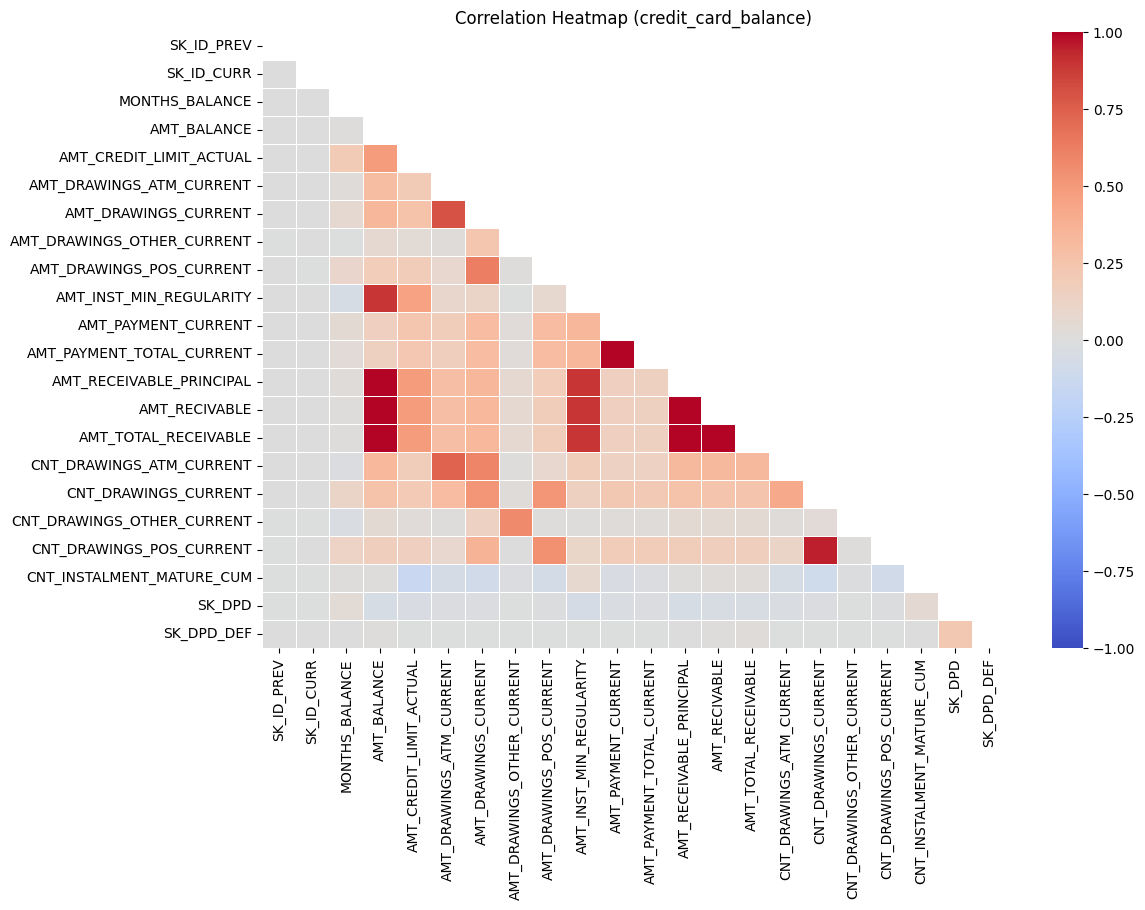

In [26]:
# Visualize the correlation matrix using a heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=False,  # Remove annotation for readability
    cmap="coolwarm", 
    linewidths=0.5, 
    vmin=-1, vmax=1  # Standardize color scale
)

# Title
plt.title("Correlation Heatmap (credit_card_balance)")
plt.show()

### 4.2 Visualising Outliers (`credit_card_balance.csv`)

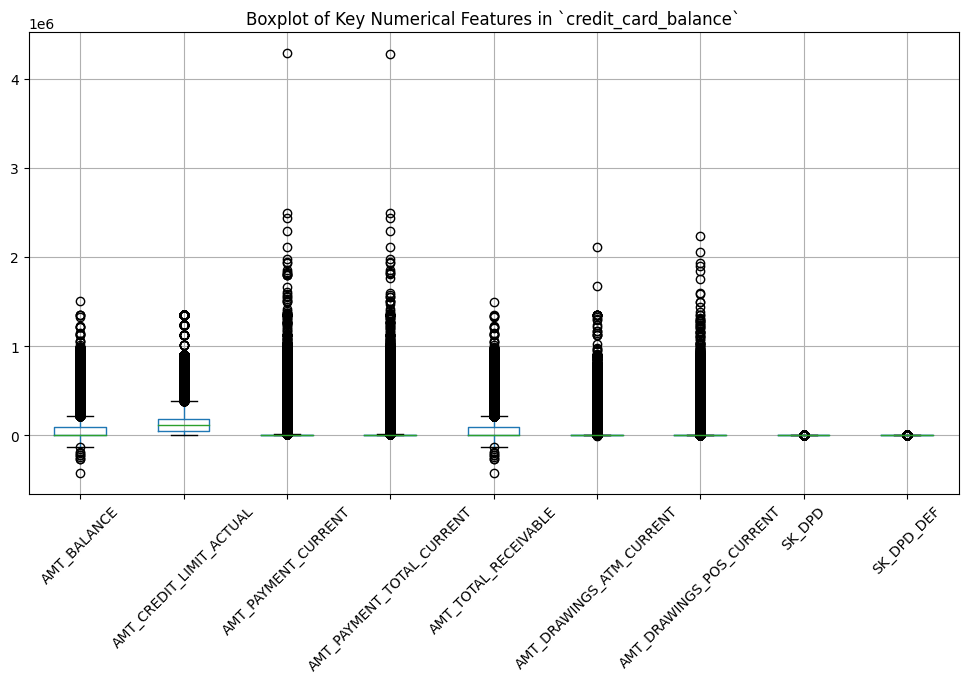

In [27]:
# Selected key numeric features for outlier detection
outlier_columns = [
    "AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL", "AMT_PAYMENT_CURRENT", 
    "AMT_PAYMENT_TOTAL_CURRENT", "AMT_TOTAL_RECEIVABLE", 
    "AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_POS_CURRENT", 
    "SK_DPD", "SK_DPD_DEF"
]

# Create boxplot
plt.figure(figsize=(12, 6))
df_credit_card_balance[outlier_columns].boxplot()

# Title
plt.title("Boxplot of Key Numerical Features in `credit_card_balance`")
plt.xticks(rotation=45)  
plt.show()

### 4.3 Pair Plot Analysis (`credit_card_balance.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

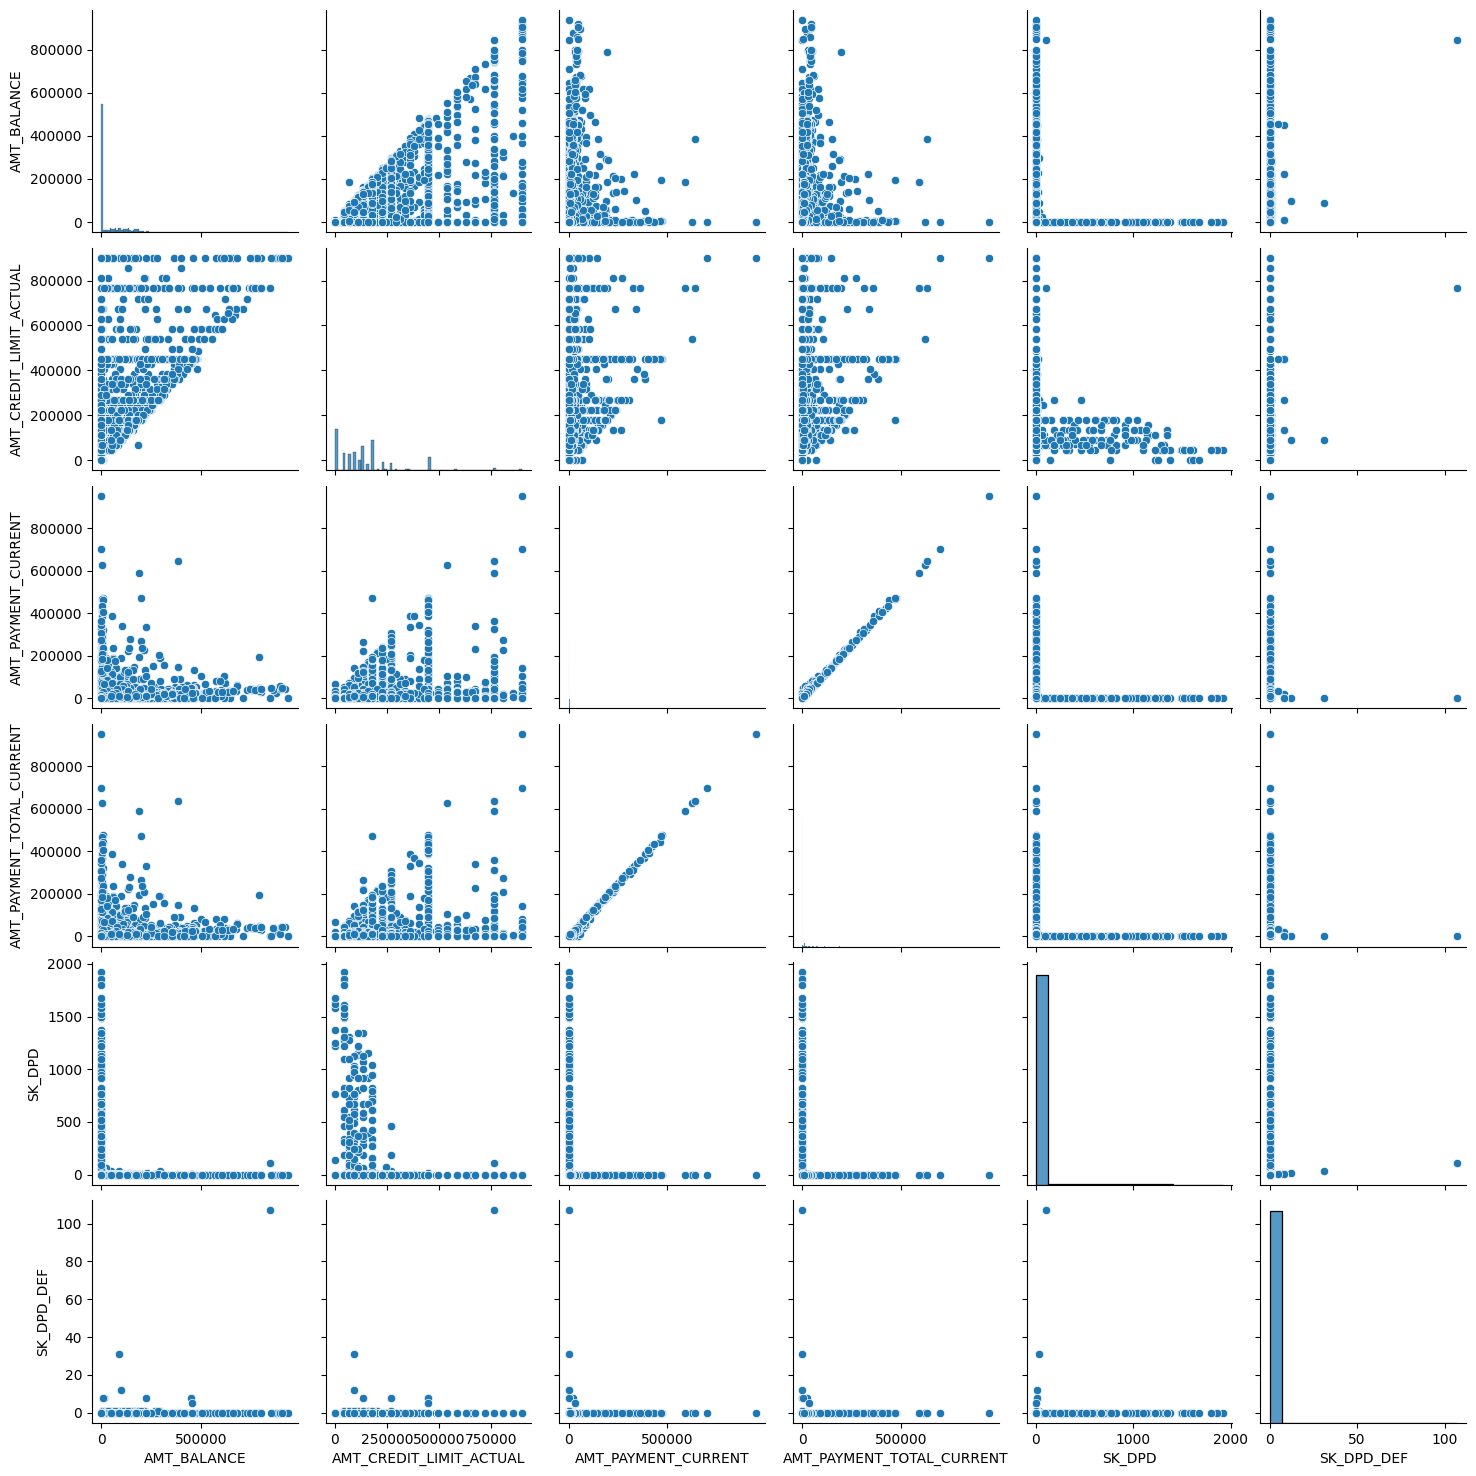

In [28]:
# Selected key numerical features for pair plot
numeric_features = [
    "AMT_BALANCE", 
    "AMT_CREDIT_LIMIT_ACTUAL", 
    "AMT_PAYMENT_CURRENT", 
    "AMT_PAYMENT_TOTAL_CURRENT", 
    "SK_DPD", 
    "SK_DPD_DEF"
]

# Reduce dataset to 10,000 rows for performance
df_sample = df_credit_card_balance[numeric_features].sample(n=10000, random_state=42)

# Create pair plot
sns.pairplot(df_sample)
plt.show()

### 4.4 Group-wise Analysis (`credit_card_balance.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


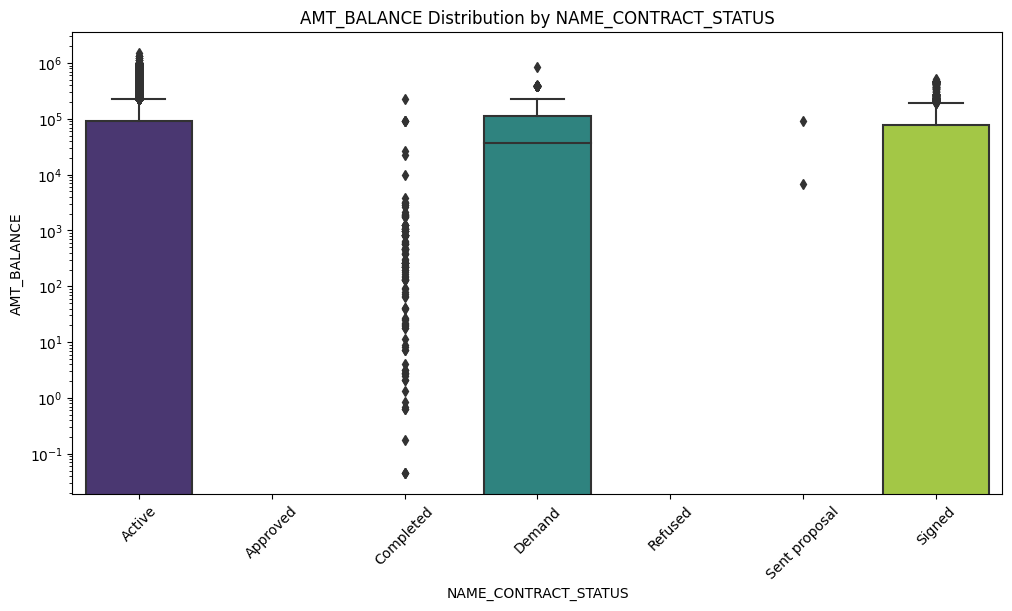

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


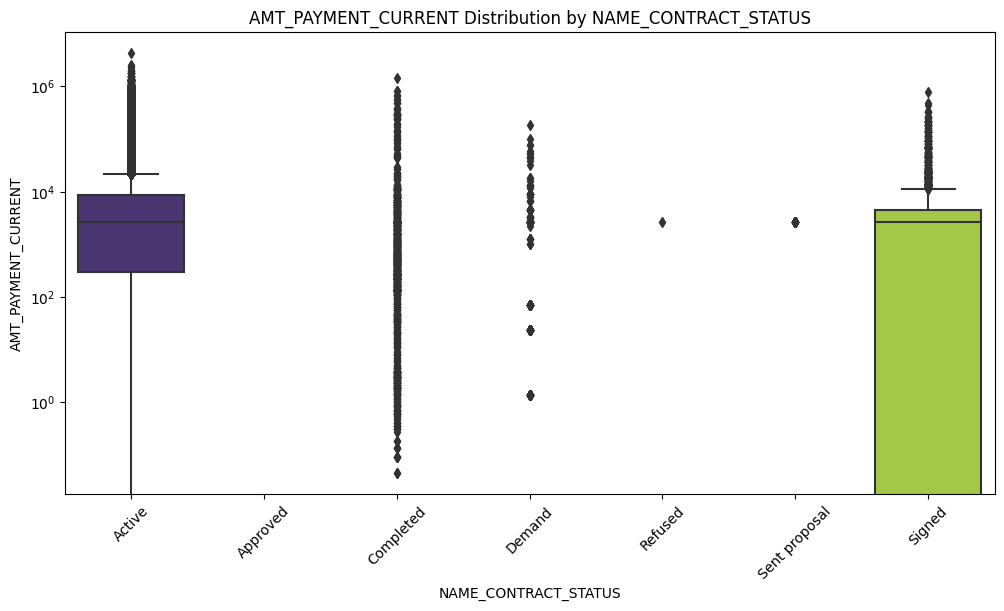

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


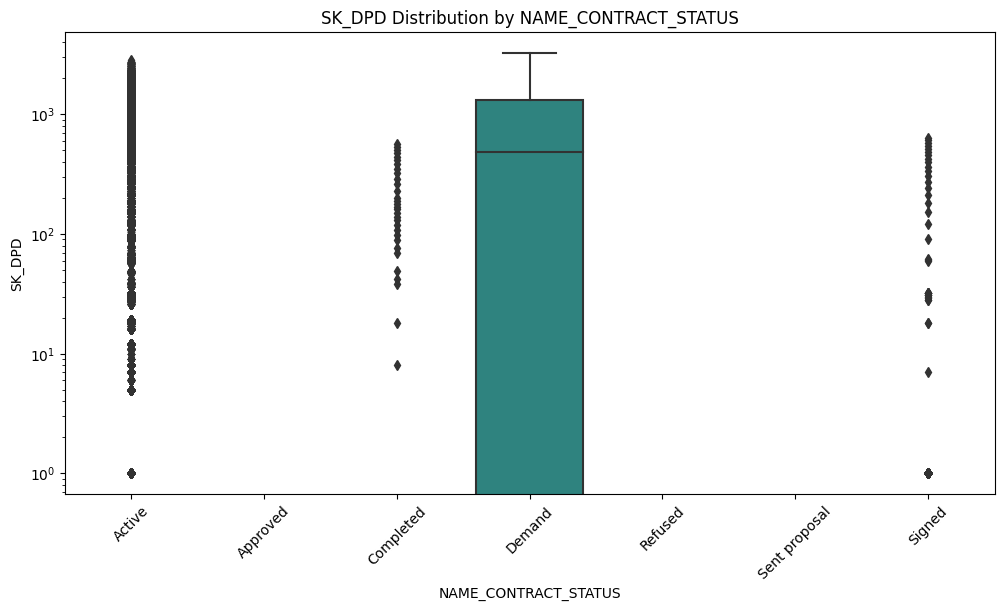

In [29]:
# Selected categorical column for group-wise analysis
categorical_col_boxplot = "NAME_CONTRACT_STATUS"

# Selected numerical columns for comparison
numeric_cols_boxplot = ["AMT_BALANCE", "AMT_PAYMENT_CURRENT", "SK_DPD"]

for numeric_col in numeric_cols_boxplot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_col_boxplot, y=numeric_col, data=df_credit_card_balance, palette="viridis", dodge=False)
    plt.title(f"{numeric_col} Distribution by {categorical_col_boxplot}")
    plt.xticks(rotation=45)
    plt.yscale("log")  # Apply log scale to handle extreme outliers
    plt.show()

### 4.5 Time-wise Analysis (`credit_card_balance.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


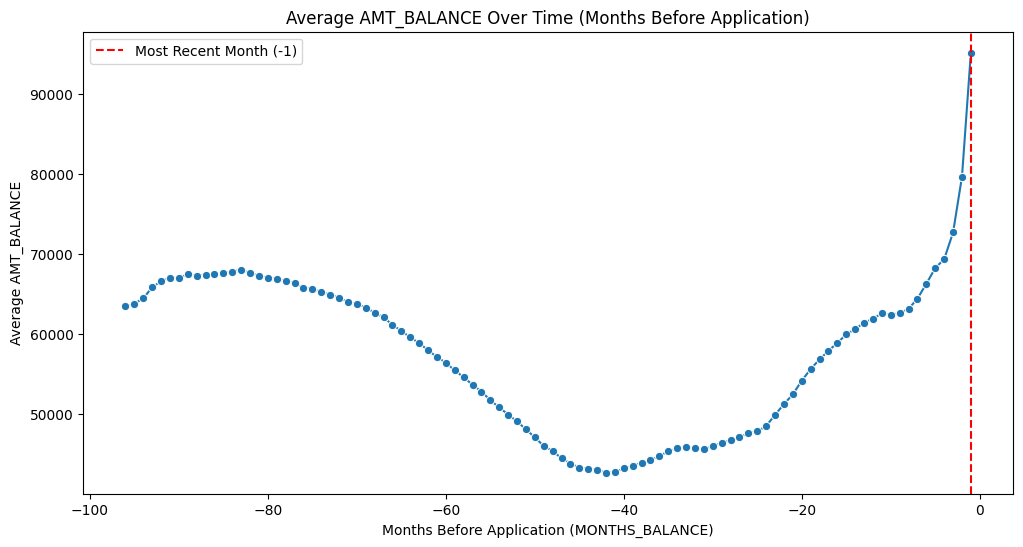

In [30]:
# Aggregate balance over time
df_balance_trend = df_credit_card_balance.groupby("MONTHS_BALANCE")["AMT_BALANCE"].mean()

# Plot balance trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_balance_trend.index, y=df_balance_trend.values, marker="o")
plt.title("Average AMT_BALANCE Over Time (Months Before Application)")
plt.xlabel("Months Before Application (MONTHS_BALANCE)")
plt.ylabel("Average AMT_BALANCE")
plt.axvline(x=-1, color="r", linestyle="--", label="Most Recent Month (-1)")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


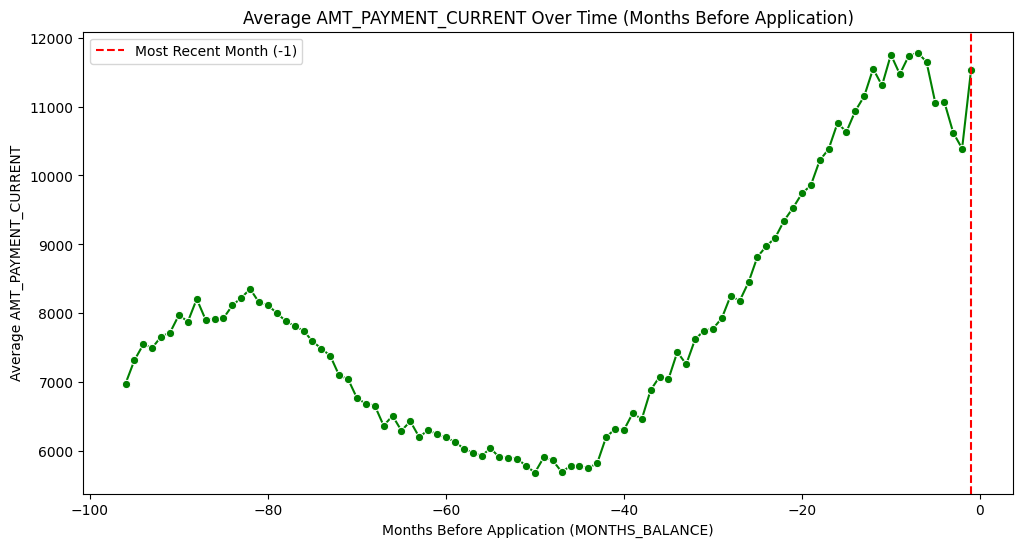

In [31]:
# Aggregate payments over time
df_payment_trend = df_credit_card_balance.groupby("MONTHS_BALANCE")["AMT_PAYMENT_CURRENT"].mean()

# Plot payment trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_payment_trend.index, y=df_payment_trend.values, marker="o", color="green")
plt.title("Average AMT_PAYMENT_CURRENT Over Time (Months Before Application)")
plt.xlabel("Months Before Application (MONTHS_BALANCE)")
plt.ylabel("Average AMT_PAYMENT_CURRENT")
plt.axvline(x=-1, color="r", linestyle="--", label="Most Recent Month (-1)")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


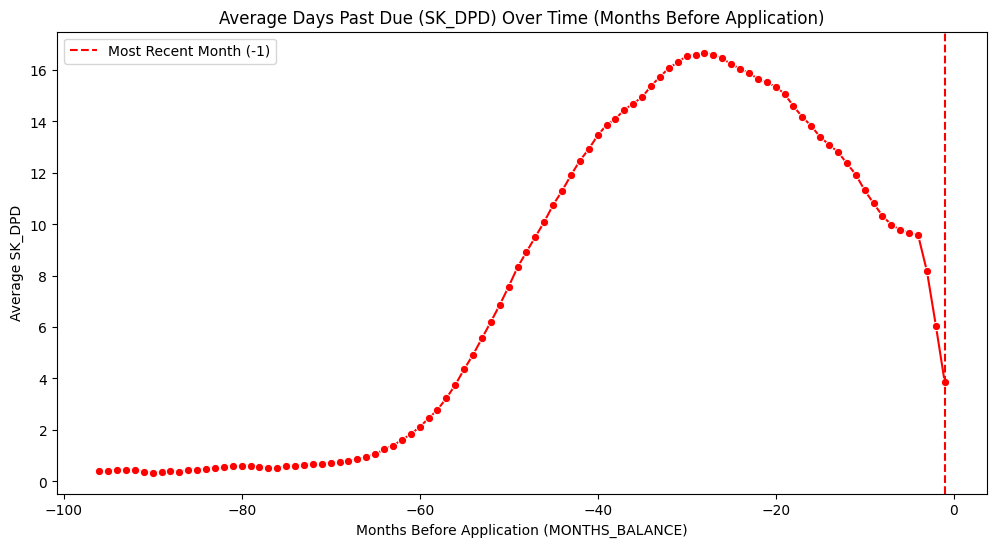

In [32]:
# Aggregate overdue trend over time
df_dpd_trend = df_credit_card_balance.groupby("MONTHS_BALANCE")["SK_DPD"].mean()

# Plot overdue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_dpd_trend.index, y=df_dpd_trend.values, marker="o", color="red")
plt.title("Average Days Past Due (SK_DPD) Over Time (Months Before Application)")
plt.xlabel("Months Before Application (MONTHS_BALANCE)")
plt.ylabel("Average SK_DPD")
plt.axvline(x=-1, color="r", linestyle="--", label="Most Recent Month (-1)")
plt.legend()
plt.show()

### 4.6 Joint Plot Analysis (`credit_card_balance.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


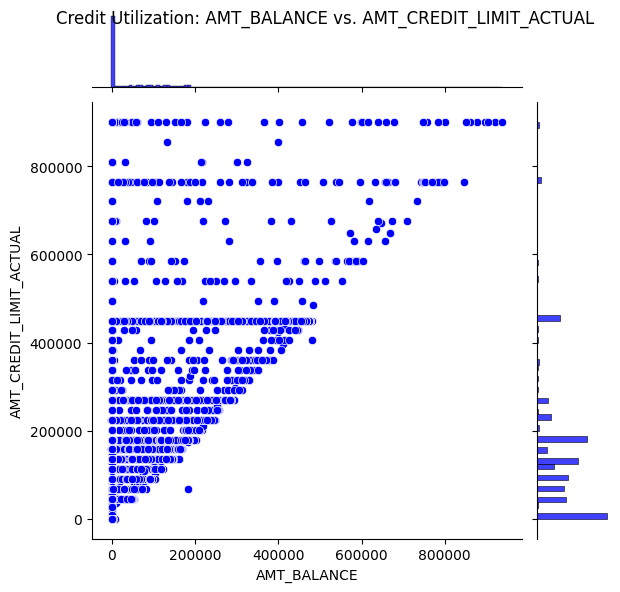

In [33]:
# Sample 10,000 rows for performance
df_sample_scatter = df_credit_card_balance.sample(n=10000, random_state=42)

# Credit Utilization vs. Balance
sns.jointplot(x="AMT_BALANCE", y="AMT_CREDIT_LIMIT_ACTUAL", data=df_sample_scatter, kind="scatter", color="blue")
plt.suptitle("Credit Utilization: AMT_BALANCE vs. AMT_CREDIT_LIMIT_ACTUAL")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


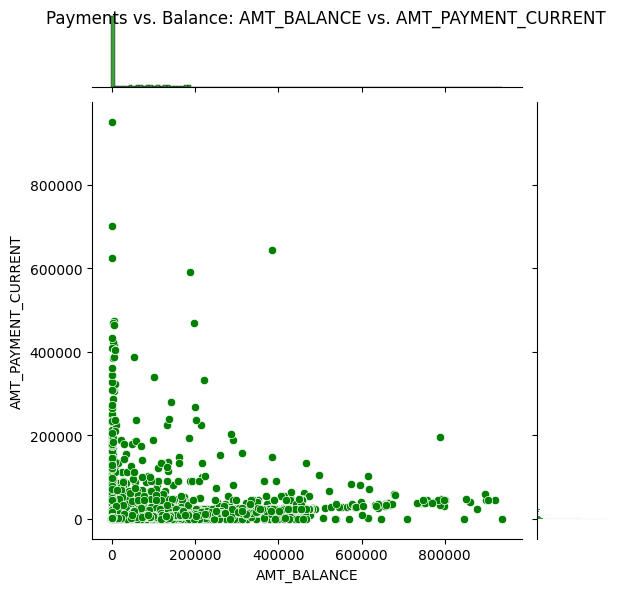

In [34]:
# Payments vs. Balance
sns.jointplot(x="AMT_BALANCE", y="AMT_PAYMENT_CURRENT", data=df_sample_scatter, kind="scatter", color="green")
plt.suptitle("Payments vs. Balance: AMT_BALANCE vs. AMT_PAYMENT_CURRENT")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


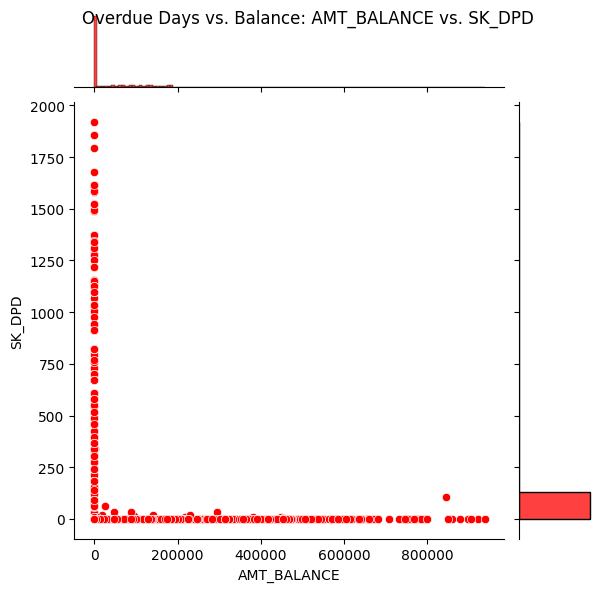

In [35]:
# Overdue Days vs. Balance
sns.jointplot(x="AMT_BALANCE", y="SK_DPD", data=df_sample_scatter, kind="scatter", color="red")
plt.suptitle("Overdue Days vs. Balance: AMT_BALANCE vs. SK_DPD")
plt.show()

### 4.7 Additional EDA Visualisations (`credit_card_balance.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


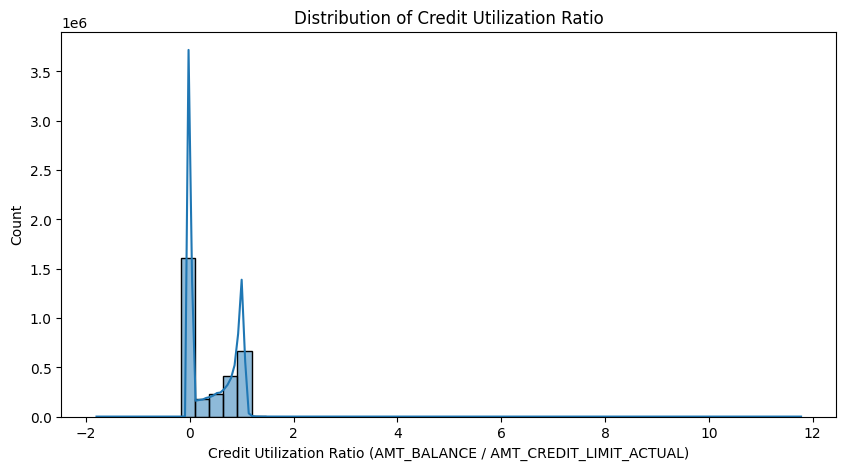

In [36]:
# Distribution of credit utilisation
plt.figure(figsize=(10, 5))
sns.histplot(df_credit_card_balance["AMT_BALANCE"] / df_credit_card_balance["AMT_CREDIT_LIMIT_ACTUAL"], bins=50, kde=True)
plt.title("Distribution of Credit Utilization Ratio")
plt.xlabel("Credit Utilization Ratio (AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL)")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


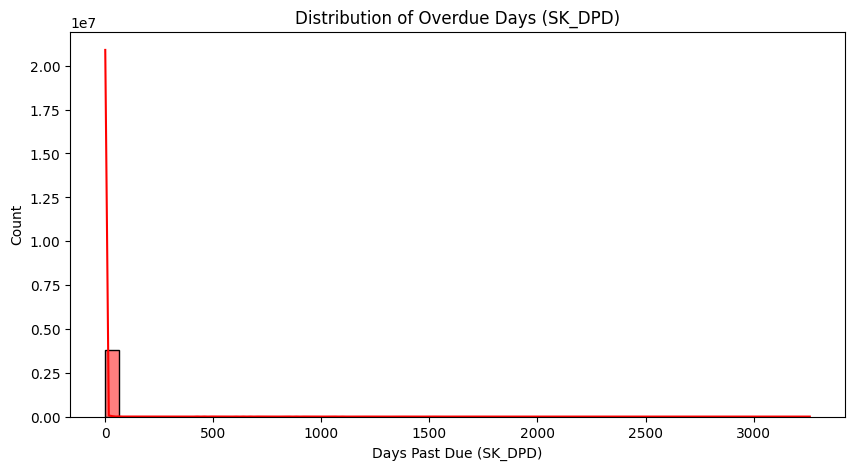

In [37]:
# Distribution of overdue days (SK_DPD)
plt.figure(figsize=(10, 5))
sns.histplot(df_credit_card_balance["SK_DPD"], bins=50, kde=True, color="red")
plt.title("Distribution of Overdue Days (SK_DPD)")
plt.xlabel("Days Past Due (SK_DPD)")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


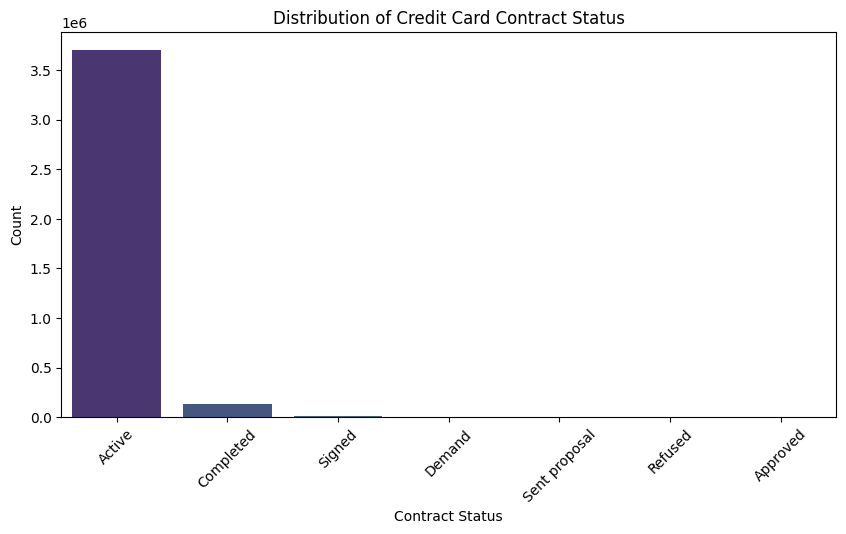

In [38]:
# Contract status distribution
plt.figure(figsize=(10, 5))
sns.countplot(x="NAME_CONTRACT_STATUS", data=df_credit_card_balance, palette="viridis", order=df_credit_card_balance["NAME_CONTRACT_STATUS"].value_counts().index)
plt.title("Distribution of Credit Card Contract Status")
plt.xlabel("Contract Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 5. Feature Engineering (`credit_card_balance.csv`)

### 5.1 Credit Activity Features (`credit_card_balance.csv`)

In [39]:
# 5.1 Credit Activity Features - Group by SK_ID_CURR
credit_card_activity_features = df_credit_card_balance.groupby("SK_ID_CURR").agg(
    credit_card_NUM_CREDIT_CARDS=("SK_ID_PREV", "count"),  # Total number of credit cards per client
    credit_card_NUM_ACTIVE_CARDS=("NAME_CONTRACT_STATUS", lambda x: (x == "Active").sum()),  # Count active credit cards
    credit_card_NUM_CLOSED_CARDS=("NAME_CONTRACT_STATUS", lambda x: (x == "Completed").sum())  # Count closed credit cards
).reset_index()

# Preview the new features before merging
display(credit_card_activity_features.head())

,SK_ID_CURR,credit_card_NUM_CREDIT_CARDS,credit_card_NUM_ACTIVE_CARDS,credit_card_NUM_CLOSED_CARDS
0,100006,6,6,0
1,100011,74,74,0
2,100013,96,96,0
3,100021,17,7,10
4,100023,8,8,0


### 5.2 Loan Amount Features (`credit_card_balance.csv`)

In [40]:
# 5.2 Loan Amount Features - Group by SK_ID_CURR
credit_card_loan_amounts = df_credit_card_balance.groupby("SK_ID_CURR").agg(
    credit_card_TOTAL_CREDIT_LIMIT=("AMT_CREDIT_LIMIT_ACTUAL", "sum"),  # Total credit limit across all credit cards
    credit_card_TOTAL_CREDIT_BALANCE=("AMT_BALANCE", "sum"),  # Total balance across all credit cards
    credit_card_TOTAL_DEBT=("AMT_RECIVABLE", "sum")  # Total outstanding debt per client
).reset_index()

# Compute Credit Utilization Ratio (Avoid division by zero)
credit_card_loan_amounts["credit_card_CREDIT_UTILIZATION_RATIO"] = (
    credit_card_loan_amounts["credit_card_TOTAL_CREDIT_BALANCE"] / credit_card_loan_amounts["credit_card_TOTAL_CREDIT_LIMIT"]
)

# Replace infinite values and fill NaNs with 0
credit_card_loan_amounts["credit_card_CREDIT_UTILIZATION_RATIO"] = credit_card_loan_amounts["credit_card_CREDIT_UTILIZATION_RATIO"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Preview the new features before merging
display(credit_card_loan_amounts.head())

,SK_ID_CURR,credit_card_TOTAL_CREDIT_LIMIT,credit_card_TOTAL_CREDIT_BALANCE,credit_card_TOTAL_DEBT,credit_card_CREDIT_UTILIZATION_RATIO
0,100006,1620000,0.000,0.000,0.000000
1,100011,12150000,4031676.225,4028055.255,0.331825
2,100013,12645000,1743352.245,1737703.665,0.137869
3,100021,11475000,0.000,0.000,0.000000
4,100023,1080000,0.000,0.000,0.000000


### 5.3 Time-Based Features (`credit_card_balance.csv`)

In [41]:
# 5.3 Time-Based Features - Group by SK_ID_CURR
credit_card_time_features = df_credit_card_balance.groupby("SK_ID_CURR").agg(
    credit_card_AVG_BALANCE_LAST_6M=("AMT_BALANCE", lambda x: x.tail(6).mean()),  # Avg balance over last 6 months
    credit_card_AVG_BALANCE_LAST_12M=("AMT_BALANCE", lambda x: x.tail(12).mean()),  # Avg balance over last 12 months
    credit_card_AVG_PAYMENT_LAST_6M=("AMT_PAYMENT_CURRENT", lambda x: x.tail(6).mean()),  # Avg payment over last 6 months
    credit_card_AVG_PAYMENT_LAST_12M=("AMT_PAYMENT_CURRENT", lambda x: x.tail(12).mean())  # Avg payment over last 12 months
).reset_index()

# Preview the new features before merging
display(credit_card_time_features.head())

,SK_ID_CURR,credit_card_AVG_BALANCE_LAST_6M,credit_card_AVG_BALANCE_LAST_12M,credit_card_AVG_PAYMENT_LAST_6M,credit_card_AVG_PAYMENT_LAST_12M
0,100006,0.0000,0.00000,2702.7000,2702.70000
1,100011,37695.4875,51313.81875,3375.5700,4078.62375
2,100013,316.1625,158.08125,38103.8775,19193.04375
3,100021,0.0000,0.00000,2702.7000,2702.70000
4,100023,0.0000,0.00000,2702.7000,2702.70000


### 5.4 Credit Overdue Features (`credit_card_balance.csv`)

In [42]:
# 5.4 Credit Overdue Features - Group by SK_ID_CURR
credit_card_overdue_features = df_credit_card_balance.groupby("SK_ID_CURR").agg(
    credit_card_TOTAL_OVERDUE=("AMT_RECEIVABLE_PRINCIPAL", "sum"),  # Total overdue principal amount
    credit_card_NUM_DPD_0_30=("SK_DPD", lambda x: ((x > 0) & (x <= 30)).sum()),  # Count of DPD between 0-30 days
    credit_card_NUM_DPD_30_90=("SK_DPD", lambda x: ((x > 30) & (x <= 90)).sum()),  # Count of DPD between 30-90 days
    credit_card_NUM_DPD_90_PLUS=("SK_DPD", lambda x: (x > 90).sum())  # Count of DPD greater than 90 days
).reset_index()

# Preview the new features before merging
display(credit_card_overdue_features.head())

,SK_ID_CURR,credit_card_TOTAL_OVERDUE,credit_card_NUM_DPD_0_30,credit_card_NUM_DPD_30_90,credit_card_NUM_DPD_90_PLUS
0,100006,0.000,0,0,0
1,100011,3877754.580,0,0,0
2,100013,1656533.745,1,0,0
3,100021,0.000,0,0,0
4,100023,0.000,0,0,0


### 5.5 Categorical Features Aggregation (`credit_card_balance.csv`)

In [43]:
# 5.5 Categorical Features Aggregation - Group by SK_ID_CURR
credit_card_categorical_features = df_credit_card_balance.groupby("SK_ID_CURR").agg(
    credit_card_STATUS_ACTIVE_RATIO=("NAME_CONTRACT_STATUS", lambda x: (x == "Active").sum() / len(x)),  # Percentage of active statuses
    credit_card_STATUS_COMPLETED_RATIO=("NAME_CONTRACT_STATUS", lambda x: (x == "Completed").sum() / len(x))  # Percentage of completed statuses
).reset_index()

# Preview the new features before merging
display(credit_card_categorical_features.head())

,SK_ID_CURR,credit_card_STATUS_ACTIVE_RATIO,credit_card_STATUS_COMPLETED_RATIO
0,100006,1.000000,0.000000
1,100011,1.000000,0.000000
2,100013,1.000000,0.000000
3,100021,0.411765,0.588235
4,100023,1.000000,0.000000


## 6. Aggregation (`credit_card_balance.csv`)

### 6.1 Aggregate All Numeric and Categorical Columns (`credit_card_balance.csv`)

In [44]:
# 🔹 Aggregate df_credit_card_balance before merging
print("\n🔄 Aggregating df_credit_card_balance by SK_ID_CURR...")

# Exclude SK_ID_PREV (transaction-level unique identifier)
agg_numeric_columns = df_credit_card_balance.select_dtypes(include=['number']).drop(columns=['SK_ID_PREV'], errors='ignore')

# 🔹 Aggregate numerical features (without std)
agg_funcs = ['mean', 'sum', 'max', 'min']  # Removed 'std' for cleaner results
agg_numeric = agg_numeric_columns.groupby('SK_ID_CURR').agg(agg_funcs)

# Rename columns to avoid multi-index issue
agg_numeric.columns = ['credit_card_agg_' + '_'.join(col) for col in agg_numeric.columns]
agg_numeric.reset_index(inplace=True)

# 🔹 Optimize categorical feature aggregation
agg_categorical_columns = df_credit_card_balance.select_dtypes(include=['object', 'category']).drop(columns=['SK_ID_PREV'], errors='ignore')

if not agg_categorical_columns.empty:
    # Instead of mode(), use value_counts().idxmax() for speed
    agg_categorical_columns = df_credit_card_balance[['SK_ID_CURR']].join(agg_categorical_columns)
    
    agg_categorical = agg_categorical_columns.groupby('SK_ID_CURR').agg(lambda x: x.value_counts().idxmax() if not x.empty else "Unknown")
    agg_categorical.columns = ['credit_card_agg_' + col + '_most_frequent' for col in agg_categorical.columns]
    agg_categorical.reset_index(inplace=True)

    # Merge aggregated numerical and categorical features
    df_credit_card_balance_aggregated = agg_numeric.merge(agg_categorical, on="SK_ID_CURR", how="left")
else:
    df_credit_card_balance_aggregated = agg_numeric

# Check new shape
print(f"✅ Aggregation complete. New df_credit_card_balance_aggregated shape: {df_credit_card_balance_aggregated.shape}")


🔄 Aggregating df_credit_card_balance by SK_ID_CURR...
✅ Aggregation complete. New df_credit_card_balance_aggregated shape: (103558, 82)


In [45]:
# 🔍 Checking Aggregation Results for df_credit_card_balance_aggregated
print("Unique Clients in df_credit_card_balance:", df_credit_card_balance["SK_ID_CURR"].nunique())
print("Rows in df_credit_card_balance_aggregated:", df_credit_card_balance_aggregated.shape[0])

# Preview the aggregated dataset
display(df_credit_card_balance_aggregated.head())  # Check structure

Unique Clients in df_credit_card_balance: 103558
Rows in df_credit_card_balance_aggregated: 103558


,SK_ID_CURR,credit_card_agg_MONTHS_BALANCE_mean,credit_card_agg_MONTHS_BALANCE_sum,credit_card_agg_MONTHS_BALANCE_max,credit_card_agg_MONTHS_BALANCE_min,credit_card_agg_AMT_BALANCE_mean,credit_card_agg_AMT_BALANCE_sum,credit_card_agg_AMT_BALANCE_max,credit_card_agg_AMT_BALANCE_min,credit_card_agg_AMT_CREDIT_LIMIT_ACTUAL_mean,...,credit_card_agg_CNT_INSTALMENT_MATURE_CUM_min,credit_card_agg_SK_DPD_mean,credit_card_agg_SK_DPD_sum,credit_card_agg_SK_DPD_max,credit_card_agg_SK_DPD_min,credit_card_agg_SK_DPD_DEF_mean,credit_card_agg_SK_DPD_DEF_sum,credit_card_agg_SK_DPD_DEF_max,credit_card_agg_SK_DPD_DEF_min,credit_card_agg_NAME_CONTRACT_STATUS_most_frequent
0,100006,-3.5,-21,-1,-6,0.000000,0.000,0.00,0.0,270000.000000,...,0,0.000000,0,0,0,0.000000,0,0,0,Active
1,100011,-38.5,-2849,-2,-75,54482.111149,4031676.225,189000.00,0.0,164189.189189,...,1,0.000000,0,0,0,0.000000,0,0,0,Active
2,100013,-48.5,-4656,-1,-96,18159.919219,1743352.245,161420.22,0.0,131718.750000,...,1,0.010417,1,1,0,0.010417,1,1,0,Active
3,100021,-10.0,-170,-2,-18,0.000000,0.000,0.00,0.0,675000.000000,...,0,0.000000,0,0,0,0.000000,0,0,0,Completed
4,100023,-7.5,-60,-4,-11,0.000000,0.000,0.00,0.0,135000.000000,...,0,0.000000,0,0,0,0.000000,0,0,0,Active


## 7. Merging (`credit_card_balance.csv`)

In [46]:
# Function to safely merge dataframes and print debugging info
def safe_merge(df_main, df_new, merge_on="SK_ID_CURR", name=""):
    """ Merges two dataframes and prints sanity checks """
    prev_shape = df_main.shape
    df_main = df_main.merge(df_new, on=merge_on, how="left")

    print(f"✅ Merged {name}: {prev_shape} -> {df_main.shape}")
    print(f"🛠️ Missing Values in {name} After Merge:\n{df_main.isnull().sum()[df_main.isnull().sum() > 0]}")
    print("-" * 50)

    return df_main

# Apply Safe Merges at the End
df_credit_card_balance_aggregated = safe_merge(df_credit_card_balance_aggregated, credit_card_activity_features, name="credit_card_activity_features")
df_credit_card_balance_aggregated = safe_merge(df_credit_card_balance_aggregated, credit_card_loan_amounts, name="credit_card_loan_amounts")
df_credit_card_balance_aggregated = safe_merge(df_credit_card_balance_aggregated, credit_card_time_features, name="credit_card_time_features")
df_credit_card_balance_aggregated = safe_merge(df_credit_card_balance_aggregated, credit_card_overdue_features, name="credit_card_overdue_features")
df_credit_card_balance_aggregated = safe_merge(df_credit_card_balance_aggregated, credit_card_categorical_features, name="credit_card_categorical_features")

print("✅ All credit card feature tables merged successfully!")

✅ Merged credit_card_activity_features: (103558, 82) -> (103558, 85)
🛠️ Missing Values in credit_card_activity_features After Merge:
Series([], dtype: int64)
--------------------------------------------------
✅ Merged credit_card_loan_amounts: (103558, 85) -> (103558, 89)
🛠️ Missing Values in credit_card_loan_amounts After Merge:
Series([], dtype: int64)
--------------------------------------------------
✅ Merged credit_card_time_features: (103558, 89) -> (103558, 93)
🛠️ Missing Values in credit_card_time_features After Merge:
Series([], dtype: int64)
--------------------------------------------------
✅ Merged credit_card_overdue_features: (103558, 93) -> (103558, 97)
🛠️ Missing Values in credit_card_overdue_features After Merge:
Series([], dtype: int64)
--------------------------------------------------
✅ Merged credit_card_categorical_features: (103558, 97) -> (103558, 99)
🛠️ Missing Values in credit_card_categorical_features After Merge:
Series([], dtype: int64)
--------------------

### 7.1 Feature Validation (`credit_card_balance.csv`)

In [50]:
# Step 1: Check for standard NaN values
missing_values_credit_card_aggregated = df_credit_card_balance_aggregated.isna().sum()
missing_values_credit_card_aggregated = missing_values_credit_card_aggregated[missing_values_credit_card_aggregated > 0]

print("\n🔍 Standard Missing Values in Aggregated Credit Card Features After Merging:")
print(missing_values_credit_card_aggregated if not missing_values_credit_card_aggregated.empty else "✅ No standard NaN values detected.")

# Step 2: Check for hidden NaNs (empty strings or 'nan' stored as a string)
hidden_nans_credit_card_aggregated = (df_credit_card_balance_aggregated == "").sum() + (df_credit_card_balance_aggregated == "nan").sum()
hidden_nans_credit_card_aggregated = hidden_nans_credit_card_aggregated[hidden_nans_credit_card_aggregated > 0]

print("\n🔍 Hidden NaNs (Empty Strings or 'nan' as Text) in Aggregated Credit Card Features After Merging:")
print(hidden_nans_credit_card_aggregated if not hidden_nans_credit_card_aggregated.empty else "✅ No hidden NaNs detected.")


🔍 Standard Missing Values in Aggregated Credit Card Features After Merging:
✅ No standard NaN values detected.

🔍 Hidden NaNs (Empty Strings or 'nan' as Text) in Aggregated Credit Card Features After Merging:
✅ No hidden NaNs detected.


In [51]:
# Step 3: Check for Inf values
inf_values_credit_card_aggregated = df_credit_card_balance_aggregated.replace([np.inf, -np.inf], np.nan).isna().sum()
inf_values_credit_card_aggregated = inf_values_credit_card_aggregated[inf_values_credit_card_aggregated > 0]

print("\n🔍 Infinite Values in Aggregated Credit Card Features After Merging:")
if inf_values_credit_card_aggregated.empty:
    print("✅ No Inf values detected.")
else:
    print(inf_values_credit_card_aggregated)


🔍 Infinite Values in Aggregated Credit Card Features After Merging:
✅ No Inf values detected.


In [49]:
# Save aggregated dataset as CSV and Pickle
df_credit_card_balance_aggregated.to_csv("credit_card_balance_aggregated.csv", index=False)
df_credit_card_balance_aggregated.to_pickle("credit_card_balance_aggregated.pkl")

print("✅ Credit Card Balance aggregated dataset saved successfully!")

✅ Credit Card Balance aggregated dataset saved successfully!
